#  Exploratory Data Analysis & Data Storytelling

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

In [2]:
# load data

df = pd.read_csv('./Data/data_cleansed.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
0,122.0,500.000000,240.0,3,730,6,6,2.0,4,2.0,298,0,2,15,53,3.0,4.804021,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13,4.804021
1,168.0,0.000000,100.0,6,14,6,0,3.0,4,1.0,161,0,6,25,31,3.0,5.123964,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,38,5.123964
2,79.0,480.000000,89.0,1,366,1,6,1.0,4,1.5,267,1,20,1,99,1.0,4.369448,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,26,4.369448
3,140.0,453.166605,100.0,1,180,1,6,1.0,3,1.0,27,1,18,1,192,1.0,4.941642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,4.941642
4,80.0,100.000000,75.0,1,730,2,6,1.0,4,1.0,49,0,0,1,22,1.0,4.382027,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4.382027


In [3]:
# df['logPrice'] column is not required for EDA
# df.drop('logPrice', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38974 entries, 0 to 38973
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   38974 non-null  float64
 1   security_deposit        38974 non-null  float64
 2   cleaning_fee            38974 non-null  float64
 3   guests_included         38974 non-null  int64  
 4   maximum_nights          38974 non-null  int64  
 5   accommodates            38974 non-null  int64  
 6   cancellation_policy     38974 non-null  int64  
 7   bedrooms                38974 non-null  float64
 8   bed_type                38974 non-null  int64  
 9   bathrooms               38974 non-null  float64
 10  zipcode                 38974 non-null  int64  
 11  room_type               38974 non-null  int64  
 12  number_of_reviews       38974 non-null  int64  
 13  property_type           38974 non-null  int64  
 14  neighbourhood_cleansed  38974 non-null

## Prepare functions for Plotting

## Plot Price Distribution

In [5]:
df.describe()

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
count,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000,38974.000000
mean,219.903731,453.166605,90.307922,2.034177,665.646816,3.826628,3.723097,1.606763,3.975573,1.513766,170.727177,0.443013,30.663314,15.952148,136.853492,2.119336,4.818635,0.104583,0.767614,0.154180,0.256812,0.398291,0.114897,0.812670,0.379612,0.368092,0.804793,0.197747,0.142043,0.353184,0.830913,0.213476,0.173218,0.281008,0.979627,0.323857,0.240109,0.372633,0.442295,0.133191,0.356828,26.554395,4.818635
std,585.234201,2078.151873,90.600365,1.873617,5149.639362,2.743995,2.526160,1.051289,0.264703,0.995962,97.019628,0.581291,55.772193,12.791453,72.446084,1.697961,0.887773,0.306019,0.422359,0.361126,0.436881,0.489552,0.318902,0.390181,0.485297,0.482293,0.396365,0.398306,0.349099,0.477965,0.374834,0.409766,0.378441,0.449497,0.141273,0.467952,0.427155,0.483512,0.496665,0.339786,0.479069,11.410647,0.887773
min,10.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585
25%,70.000000,100.000000,35.000000,1.000000,30.000000,2.000000,0.000000,1.000000,4.000000,1.000000,78.000000,0.000000,1.000000,1.000000,79.000000,1.000000,4.248495,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,4.248495
50%,115.000000,300.000000,80.000000,1.000000,1125.000000,3.000000,4.000000,1.000000,4.000000,1.000000,190.000000,0.000000,8.000000,22.000000,133.000000,2.000000,4.744932,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,4.744932
75%,199.000000,453.166605,100.000000,2.000000,1125.000000,5.000000,6.000000,2.000000,4.000000,2.000000,254.000000,1.000000,34.000000,25.000000,196.000000,3.000000,5.293305,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,37.000000,5.293305
max,25000.000000,250000.000000,2500.000000,24.000000,1000000.000000,40.000000,8.000000,15.000000,4.000000,16.000000,312.000000,2.000000,813.000000,44.000000,262.000000,50.000000,10.126631,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,10.126631


Mean price = 219.903731

Median price = 115.0

Minimum price = 10.0

Maximum price = 25000.0

## Question1 : Question: what is the overall distribution of prices?

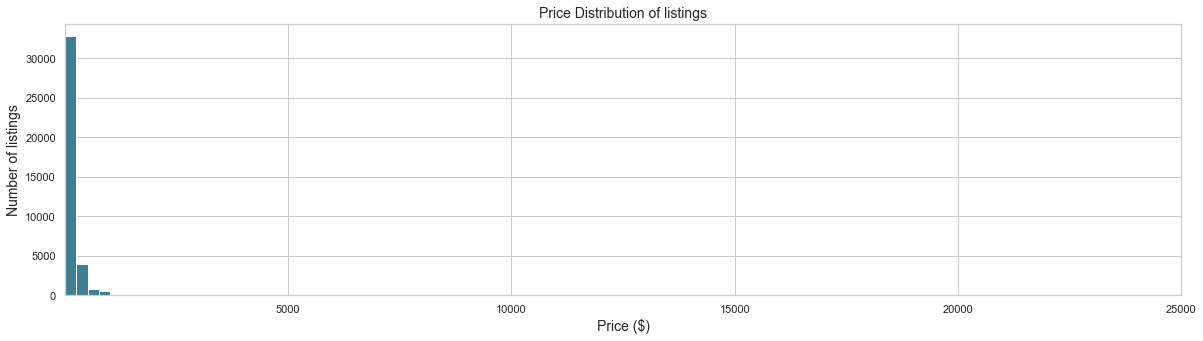

In [6]:
# Distribution of prices 
plt.figure(figsize=(20,5))
df.price.hist(bins=100)
plt.margins(x=0)
plt.title("Price Distribution of listings", fontsize=14)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Number of listings", fontsize=14)
plt.show()

Most of the listings are below $5000 per night.

In [7]:
# How many listings are prices at $50
print(f"Number of listings charging less then $50 per night = {sum(df['price'] < 50)}")

Number of listings charging less then $50 per night = 4838


In [8]:
# Check how many listings are above $5000
print(f"Number of listings charging more then $5000 per night = {sum(df['price'] > 5000)}")

Number of listings charging more then $5000 per night = 91


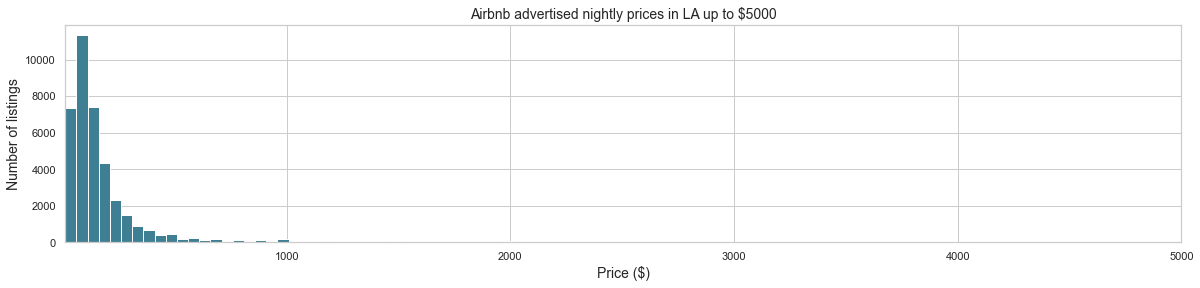

In [9]:
# Distribution of prices from $10.0 to $5000.0
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(10,5000))
plt.margins(x=0)
plt.title("Airbnb advertised nightly prices in LA up to $5000", fontsize=14)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Number of listings", fontsize=14)
plt.show()

In [10]:
df.loc[df['price'] < 25].head(20)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
177,10.0,0.000000,50.000000,1,20,6,0,3.0,4,1.0,282,0,4,6,147,3.0,2.302585,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,27,2.302585
1260,21.0,453.166605,90.307922,1,60,2,4,1.0,4,2.0,249,1,40,25,145,1.0,3.044522,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,27,3.044522
1288,19.0,453.166605,90.307922,1,60,1,4,1.0,4,2.0,249,2,35,25,127,1.0,2.944439,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,28,2.944439
1343,23.0,100.000000,20.000000,1,365,1,4,1.0,1,1.0,203,2,28,25,186,1.0,3.135494,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,29,3.135494
2602,24.0,0.000000,0.000000,1,180,2,4,1.0,4,1.0,249,1,19,25,145,1.0,3.178054,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27,3.178054
2603,23.0,0.000000,0.000000,1,180,2,4,1.0,4,1.0,249,1,21,25,127,1.0,3.135494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,27,3.135494
2604,24.0,0.000000,0.000000,1,180,2,4,1.0,4,1.0,249,1,27,25,127,1.0,3.178054,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,27,3.178054
2990,16.0,0.000000,20.000000,1,1125,2,4,1.0,4,1.0,307,1,3,25,79,1.0,2.772589,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7,2.772589
3760,20.0,453.166605,90.307922,1,1125,2,0,1.0,4,1.0,68,1,2,25,226,1.0,2.995732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2.995732
3972,20.0,100.000000,25.000000,2,93,1,6,1.0,1,1.0,35,2,0,1,108,1.0,2.995732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,26,2.995732


In [11]:
df.loc[df['price'] > 10000].head(20)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
15406,25000.0,5000.0,250.000000,1,1125,16,6,8.0,4,12.0,286,0,0,43,101,10.0,10.126631,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,38,10.126631
17054,13158.0,30000.0,90.307922,14,1125,14,1,6.0,4,8.5,292,0,0,43,25,6.0,9.484785,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25,9.484785
17058,22000.0,150000.0,90.307922,18,1125,18,1,8.0,4,10.5,286,0,0,43,101,10.0,9.998798,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,38,9.998798
17064,15790.0,100000.0,90.307922,16,1125,16,1,8.0,4,8.5,292,0,0,43,25,8.0,9.667132,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25,9.667132
17070,21053.0,50000.0,90.307922,21,1125,21,1,9.0,4,12.5,288,0,0,43,19,10.0,9.954798,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25,9.954798
17408,15790.0,100000.0,90.307922,12,1125,12,1,6.0,4,7.5,292,0,0,43,25,5.0,9.667132,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25,9.667132
23840,12000.0,100000.0,90.307922,12,1125,12,1,7.0,4,11.5,292,0,0,43,25,6.0,9.392662,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,26,9.392662
24992,11232.0,5000.0,300.000000,1,365,6,6,4.0,4,4.0,285,0,0,43,100,4.0,9.326522,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,38,9.326522
24993,19008.0,5000.0,600.000000,1,365,8,6,5.0,4,10.0,286,0,0,43,101,5.0,9.852615,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,26,9.852615
26006,22000.0,100000.0,90.307922,14,1125,14,1,7.0,4,6.5,292,0,0,43,25,5.0,9.998798,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,9.998798


In [12]:
# Replacing values under $50 with $50
# df.loc[df.price <= 50, 'price'] = 50

# Replacing values over $10000 with $10000
# df.loc[df.price >= 5000, 'price'] = 5000

## Median price of Airbnbs accommodating different number of guests

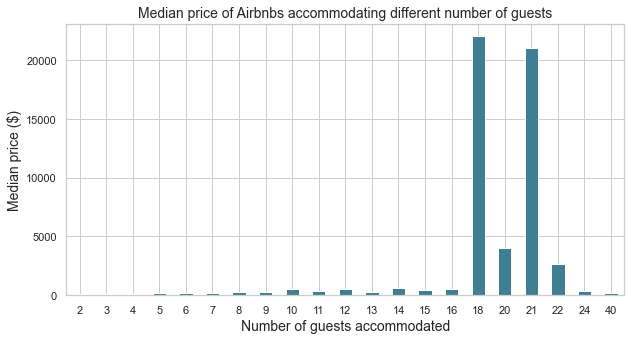

In [13]:
# Median price of Airbnbs accommodating different number of guests
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

## How price varies with people accommodated, bathrooms, bedrooms and beds

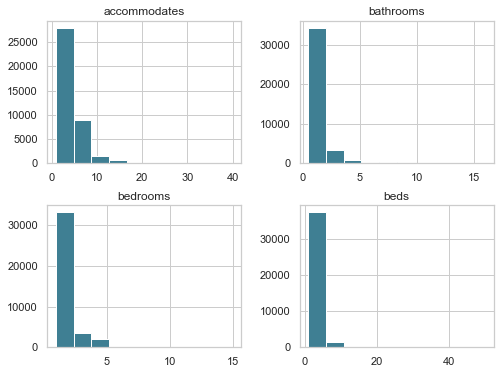

In [14]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

### Effect of room type on price

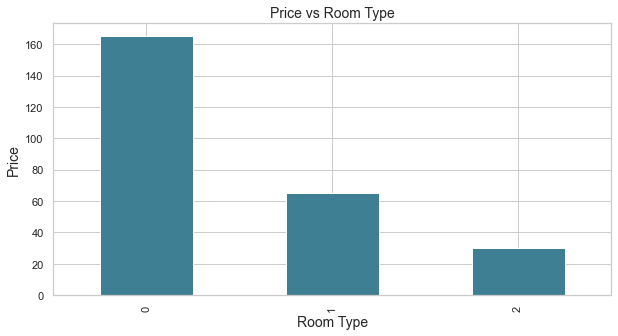

In [15]:
# Effect of room type on price
plt.figure(figsize=(10,5))
df.groupby('room_type').price.median().plot(kind='bar')
plt.title('Price vs Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [16]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/room_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0, 3)))

['Entire home/apt' 'Private room' 'Shared room']


Price of Entire house is the highest, private room comes is second highest and shared room cost the least.

### Beds vs Accommodates

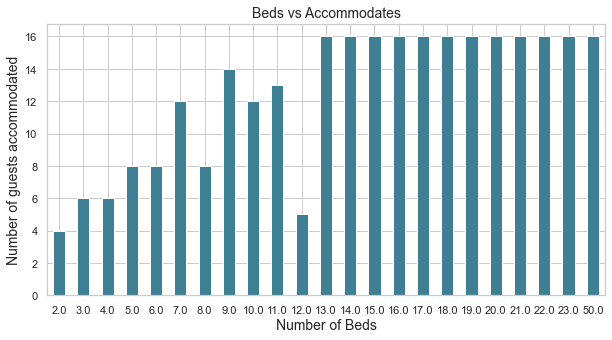

In [17]:
# Beds vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('beds').accommodates.median().plot(kind='bar')
plt.title('Beds vs Accommodates', fontsize=14)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

### Bedrooms vs Price

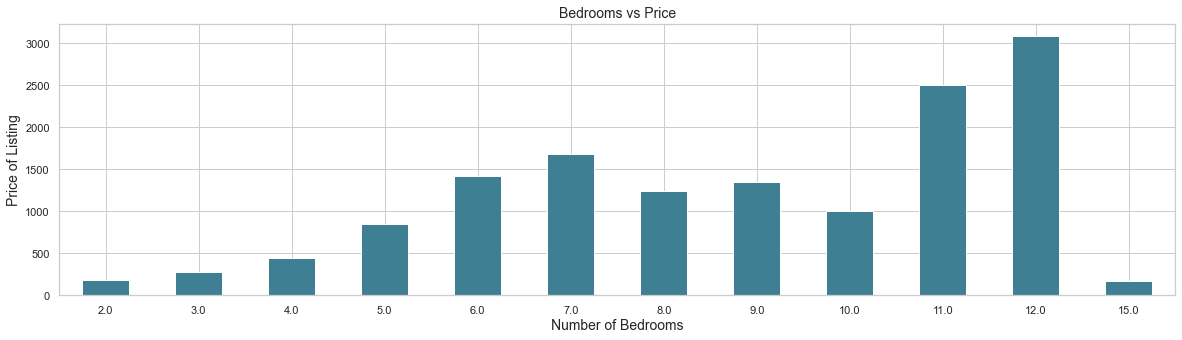

In [18]:
# Bedrooms vs Price
plt.figure(figsize=(20,5))
df.groupby('bedrooms').price.median().plot(kind='bar')
plt.title('Bedrooms vs Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price of Listing', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

### Bathrooms vs Price

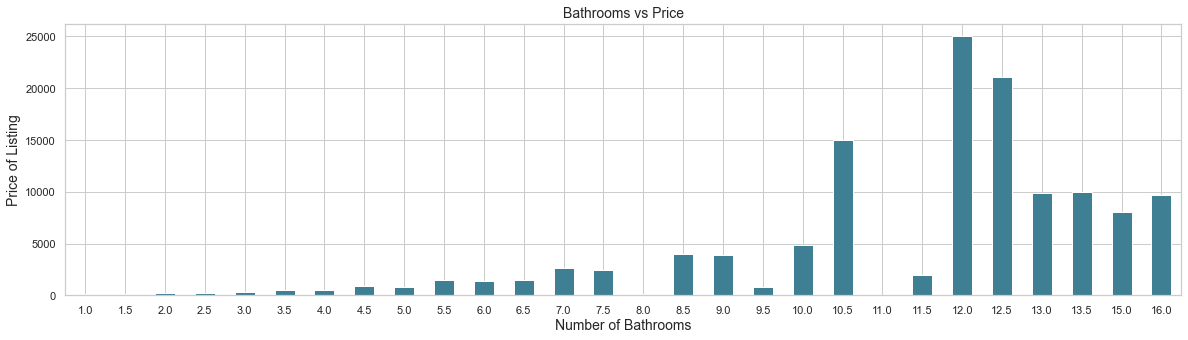

In [19]:
# Bathrooms vs Price 
plt.figure(figsize=(20,5))
df.groupby('bathrooms').price.median().plot(kind='bar')
plt.title('Bathrooms vs Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price of Listing', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

### Bathrooms vs Bedrooms

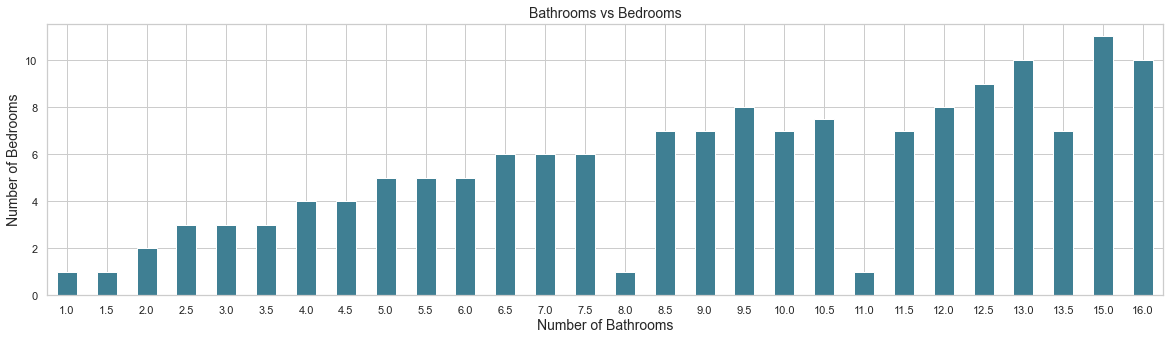

In [20]:
# Bathrooms vs Bedrooms
plt.figure(figsize=(20,5))
df.groupby('bathrooms').bedrooms.median().plot(kind='bar')
plt.title('Bathrooms vs Bedrooms', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Number of Bedrooms', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

The most common property setup sleeps two people in one bed in one bedroom, with one bathroom. Properties that accommodate more people have noticeably higher nightly rates.

There are many properties with nightly price less than $50. Such properties are usually charging very high security deposit, cleaning fee etc.

Some properties have very high values for some features (e.g. one property claims to have 16 bathrooms), but these will be left for now in the interests of time (as double-checking them would be time-consuming).

Based on the matrix output, there does not seem to be any obvious problems amongst the predictors. 

There seems to be a relationship between the following predictors: accommodates, bedrooms, bathrooms and beds.

This makes intuitive sense as the more bedrooms a listing has the more individuals it can accommodate. However, we do see that the results are loosely related and not resemblance of a straight line which may be a result of varying accommodations, sleeping arrangements and layout of the listing itself. Thus, there is no strong evidence of collinearity among the predictors. We do note that the distributions for many of the predictors are strongly skewed right (including the standardization as well). Again, this makes intuitive sense as a majority of listings on Airbnb are single bed listings that typically seek to accommodate 1 or few persons.

## What are the most common property and room types

In [21]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/property_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0, 10)))

['Aparthotel' 'Apartment' 'Barn' 'Bed and breakfast' 'Boat'
 'Boutique hotel' 'Bungalow' 'Bus' 'Cabin' 'Camper/RV']


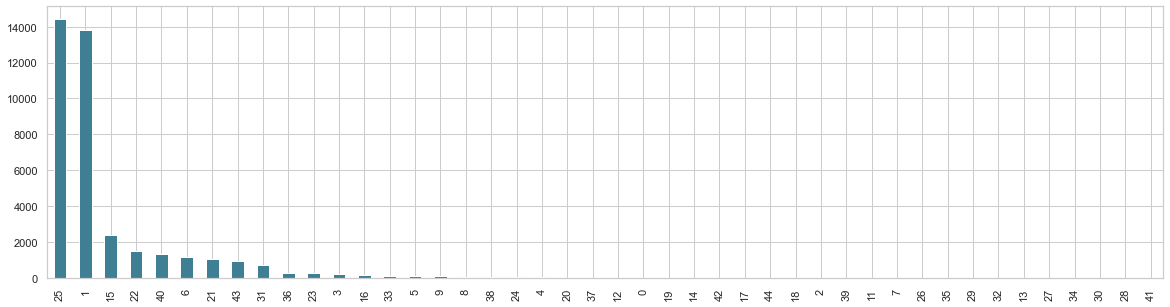

In [22]:
df['property_type'].value_counts().plot(kind='bar', figsize=(20,5))

Majority of properties are house. The remainder are apartment or other property types.

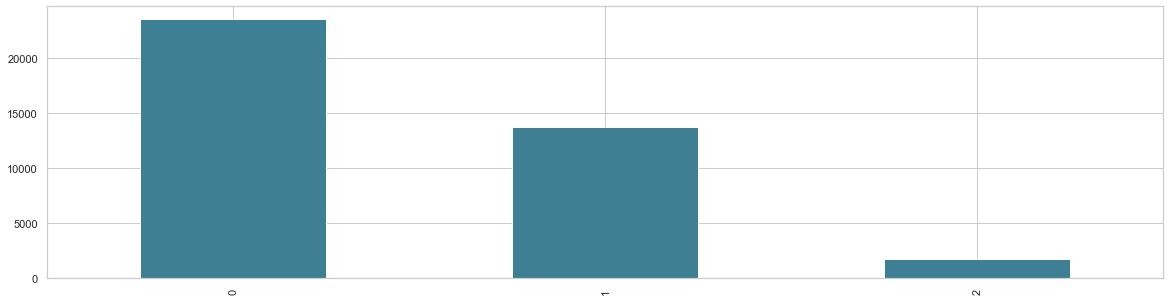

In [23]:
df['room_type'].value_counts().plot(kind='bar', figsize=(20,5))

About 23000 listings are for entire house. Rest are are private rooms. Fewer than 1% are shared rooms.

## Relationship between listing price and amenities

In [24]:
# Graph plots
def binary_count_and_price_plot(col, figsize=(20,5)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=14, y=1)
    
    df.groupby(col).size().plot(kind='bar', ax=ax1)
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2)
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

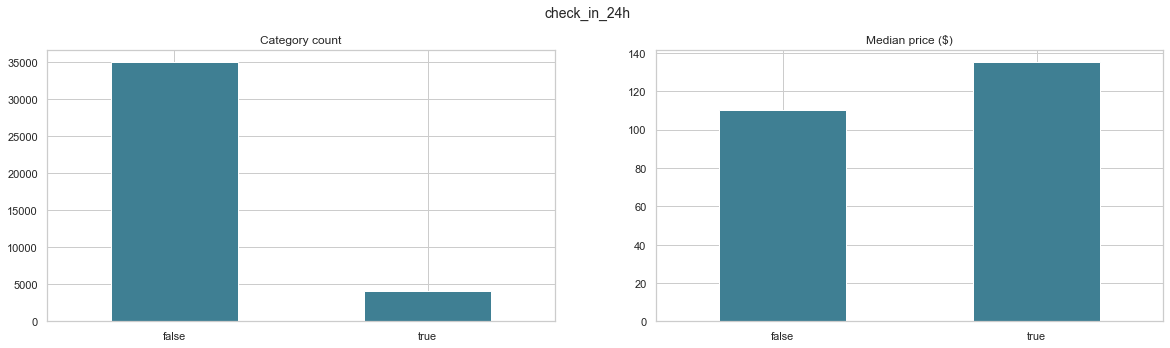

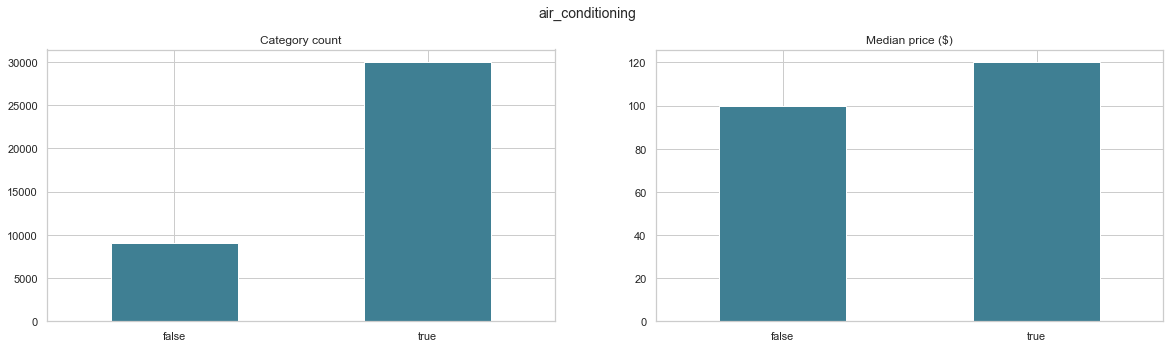

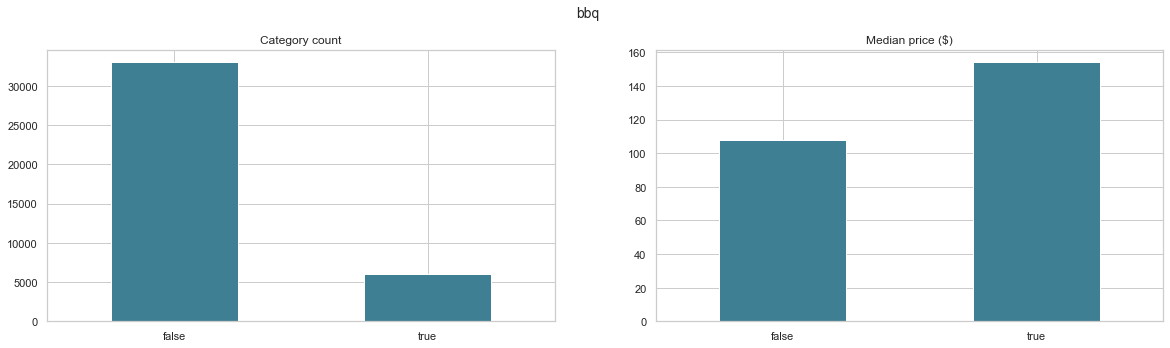

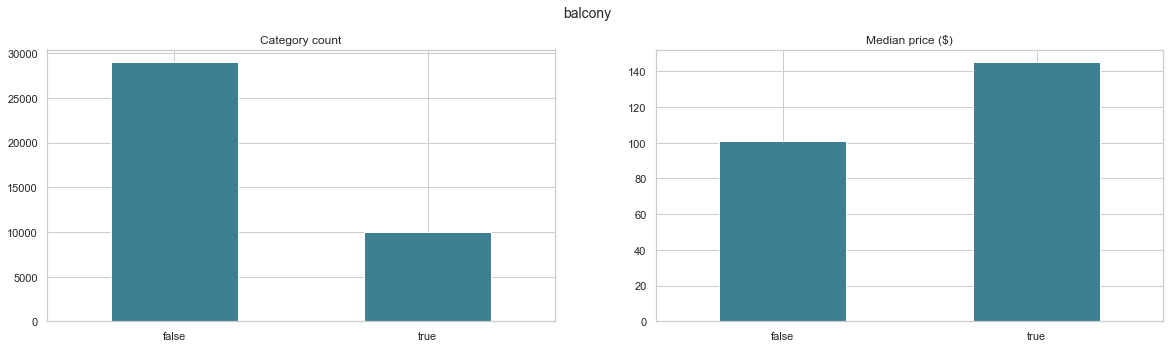

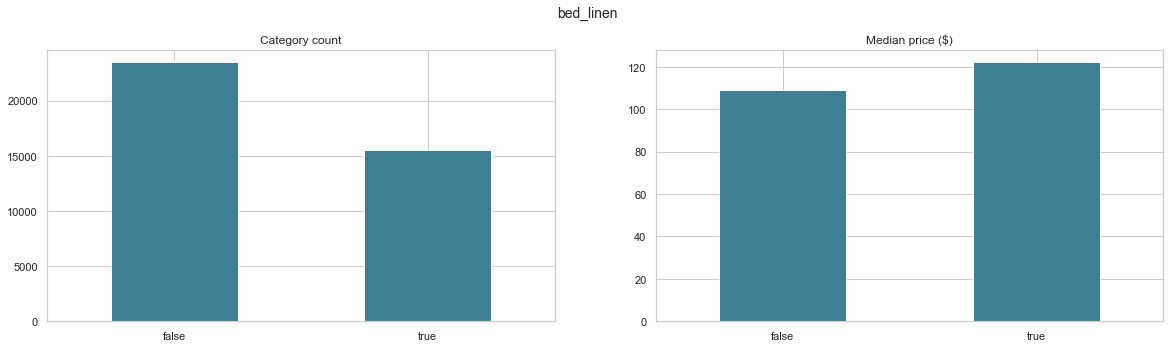

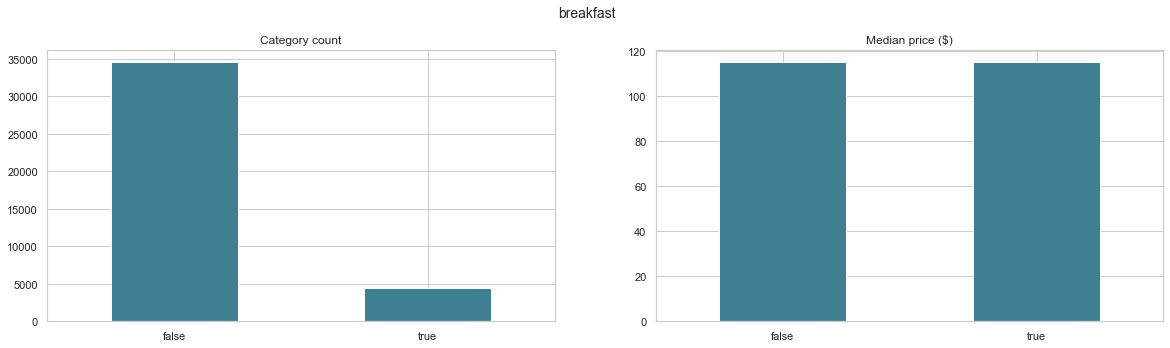

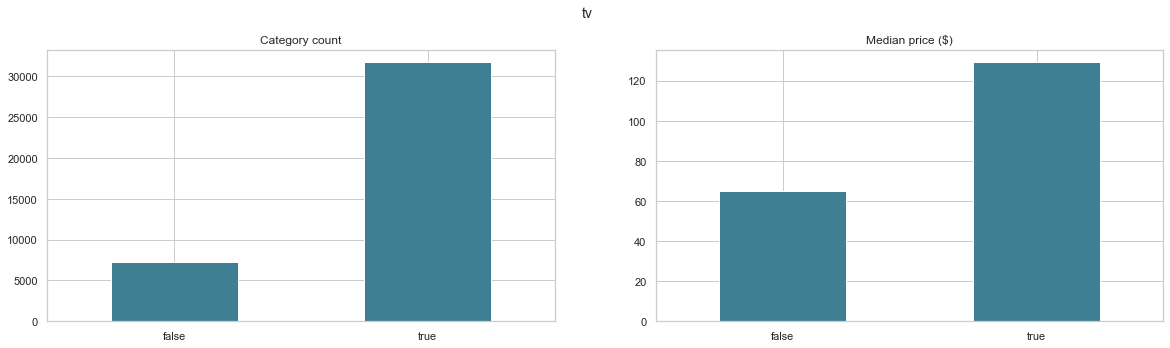

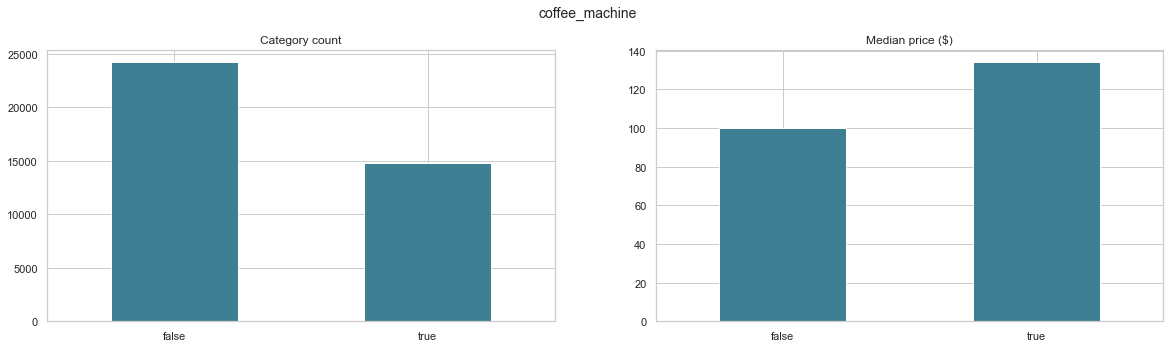

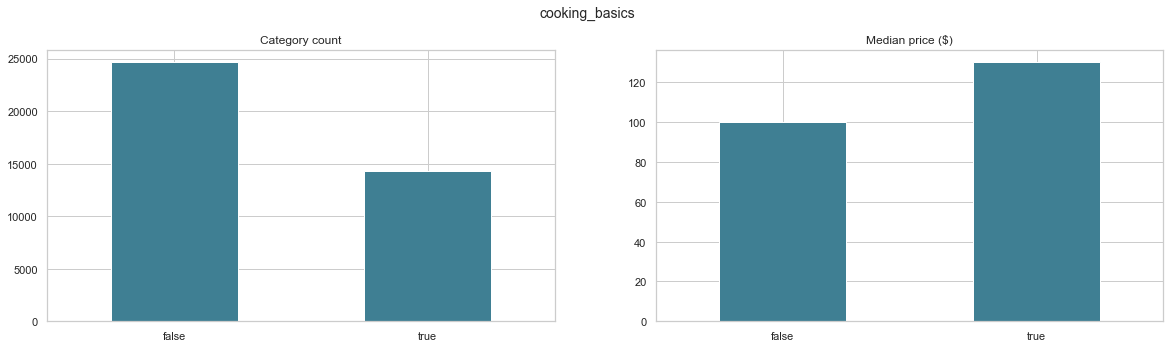

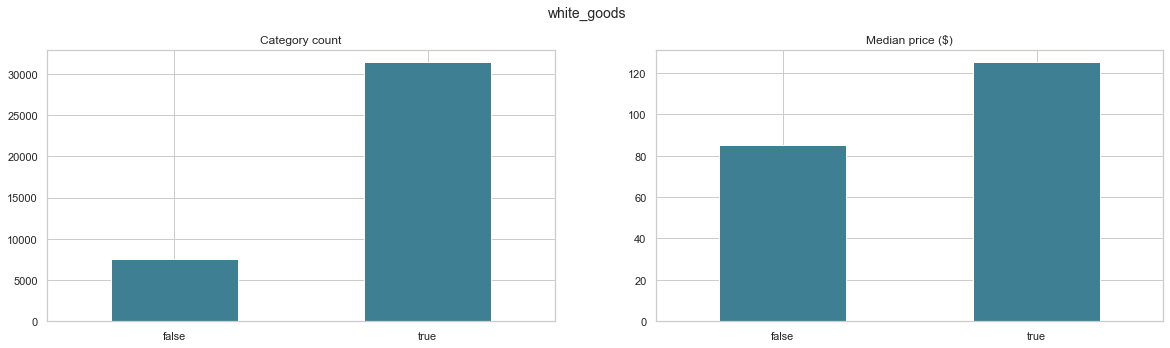

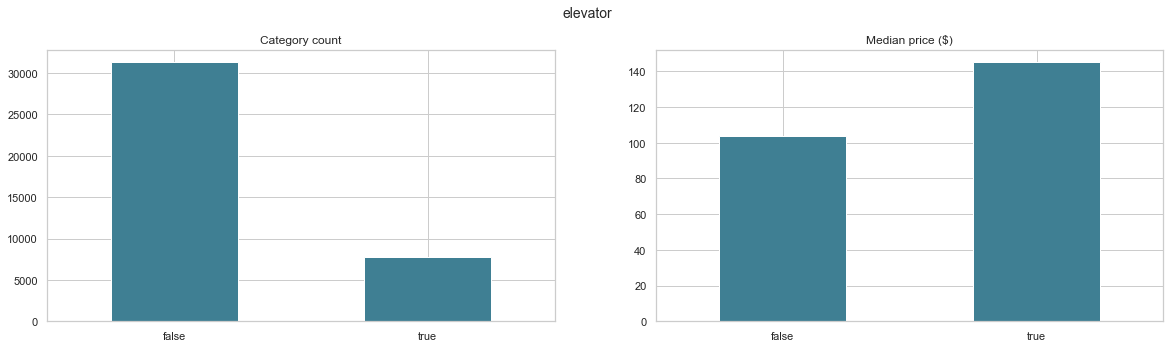

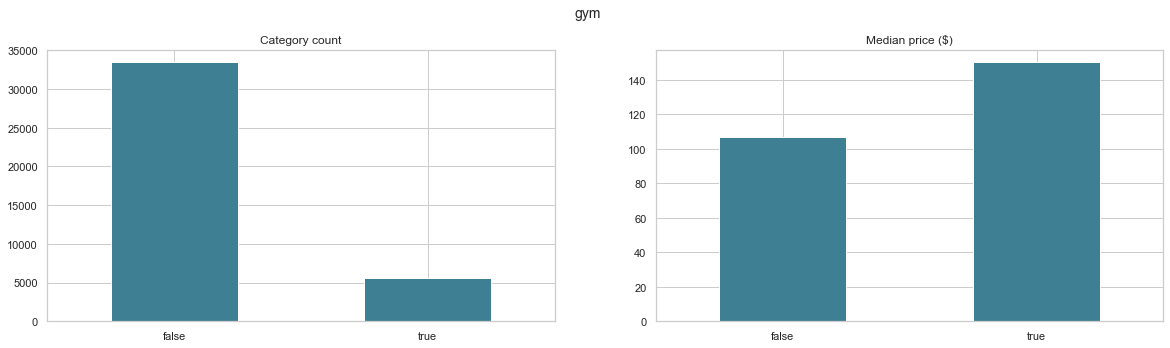

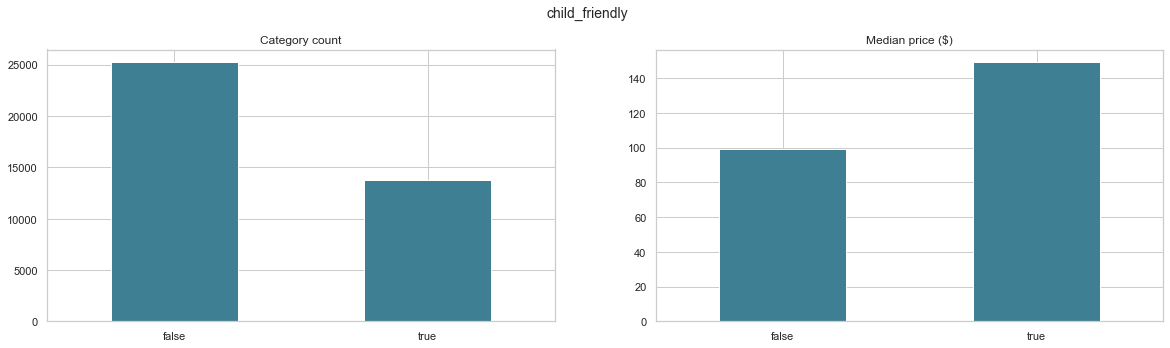

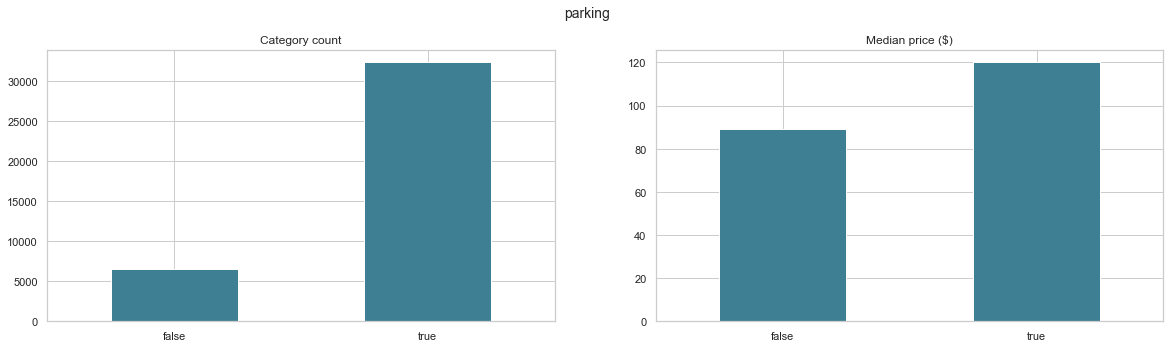

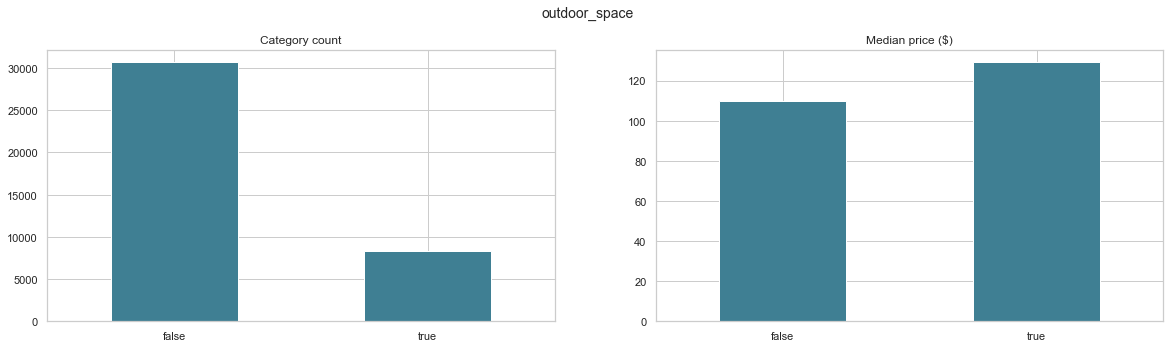

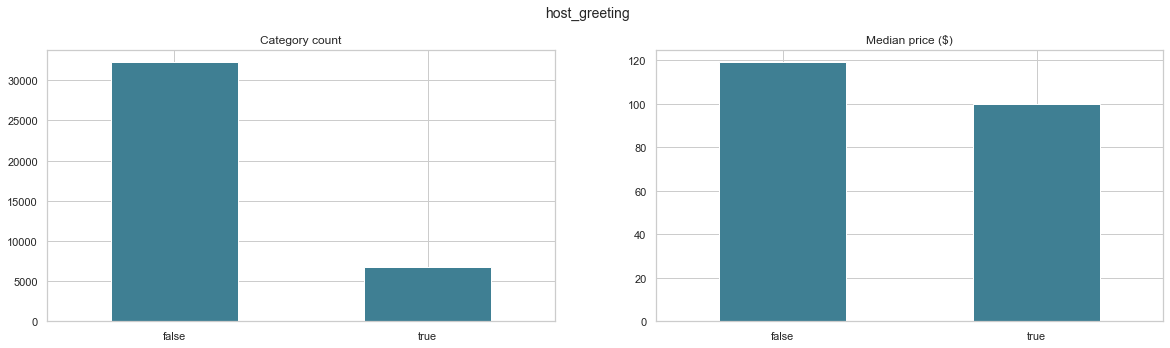

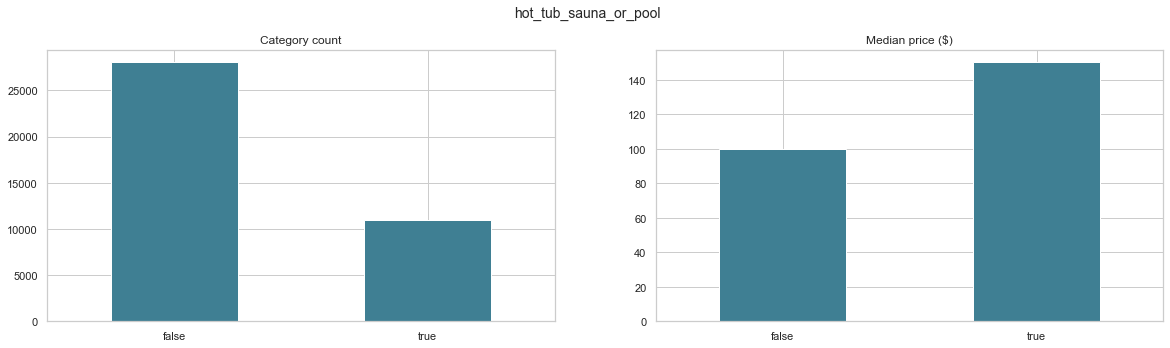

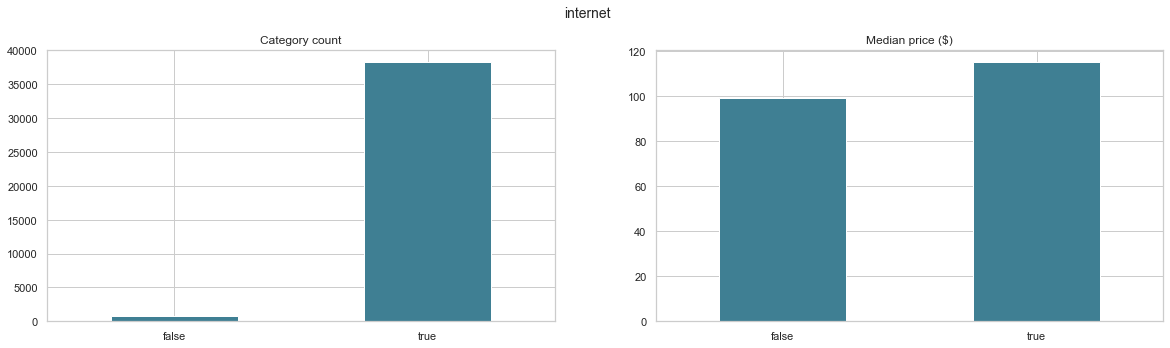

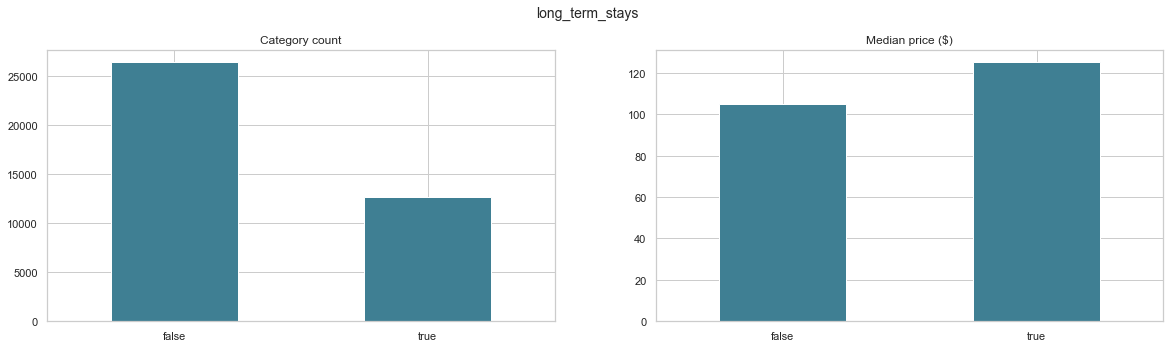

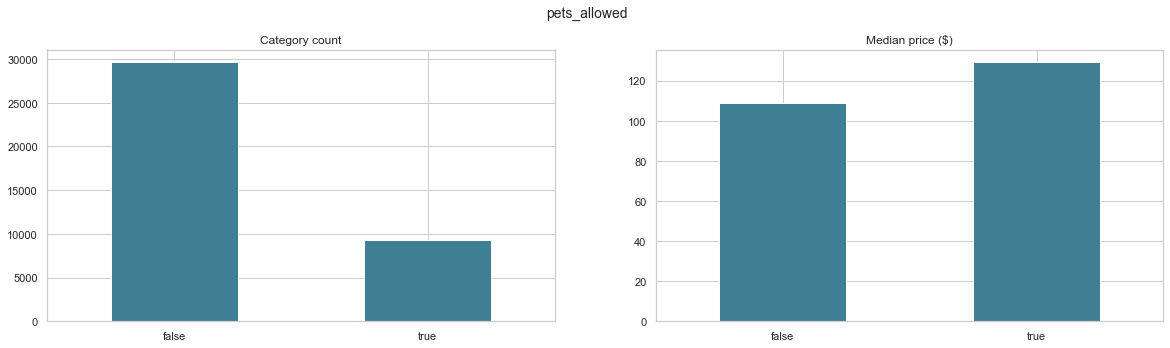

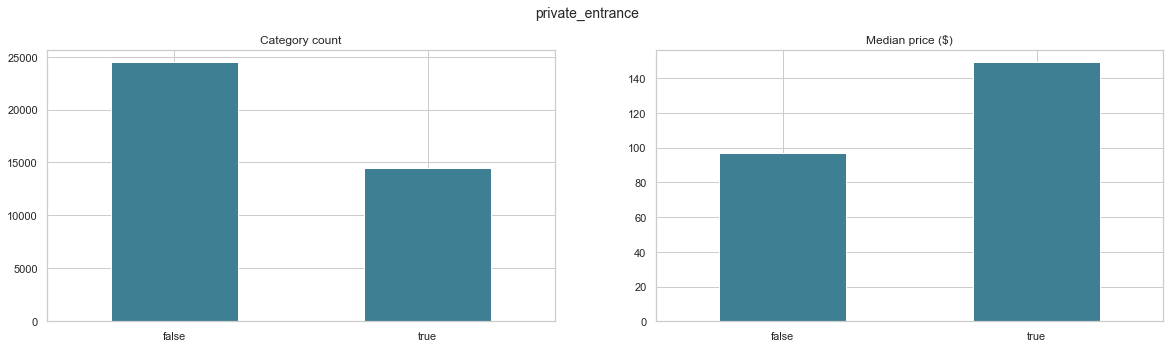

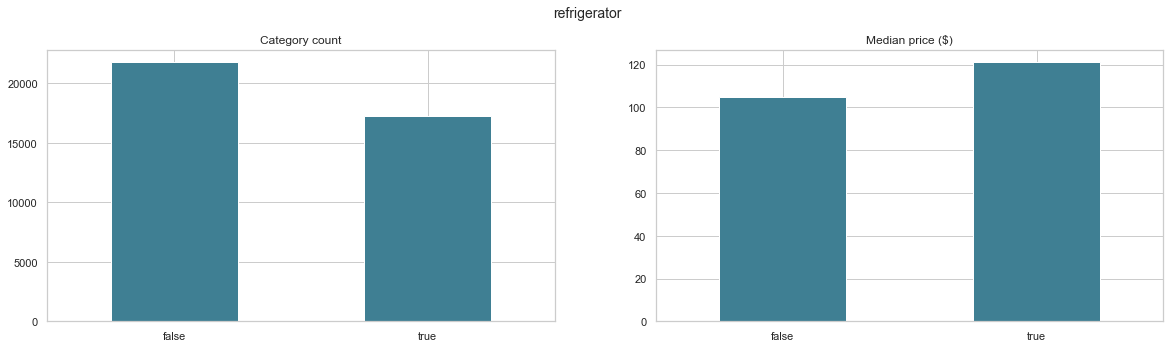

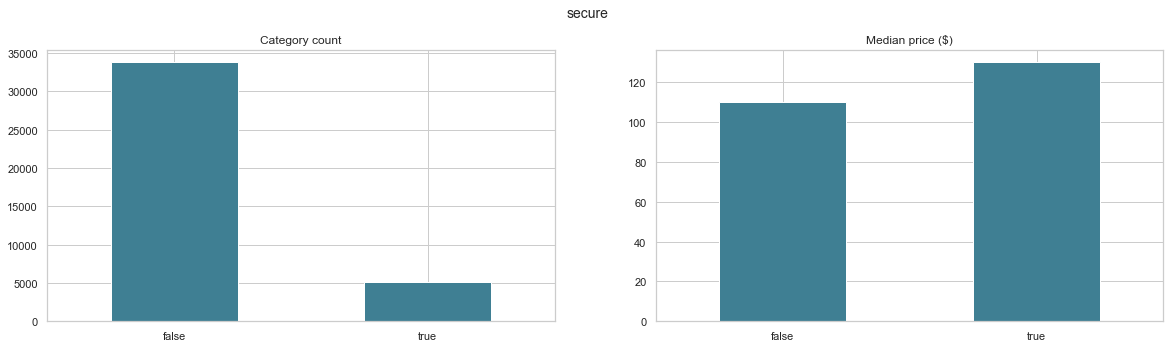

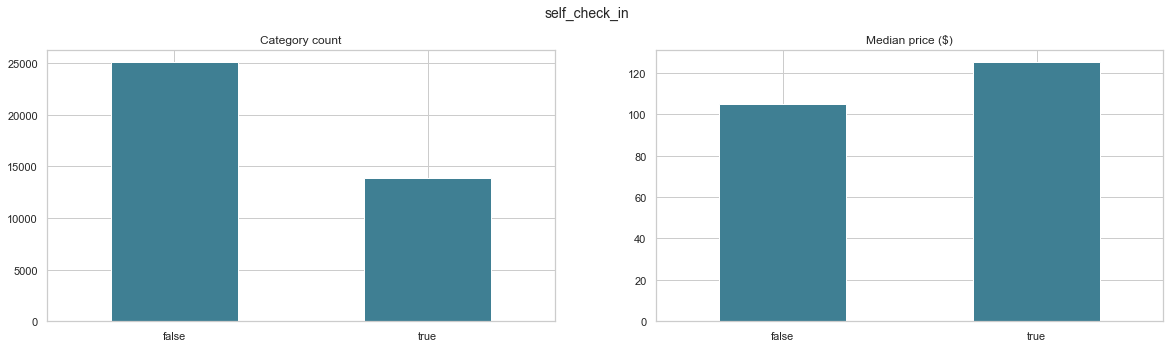

In [25]:
for col in df.iloc[:,17:-2].columns:
    binary_count_and_price_plot(col, figsize=(20,5))

### Features that increase price:
check_in_24h, air_conditioning, bbq, balcony, bed_linen, tv, coffee_machine, cooking_basics, white_goods, elevator, gym, child_friendly, parking, outdoor_space, hot_tub_sauna_or_pool, internet, long_term_stays, pets_allowed, private_entrance, refrigerator, secure

# Neighbourhood

## Which areas have the most Airbnb properties, and which are the most expensive?

In [26]:
df.neighbourhood_cleansed.value_counts()

232    2262
99     2168
129    1378
60     1365
192     974
       ... 
200       1
43        1
57        1
63        1
49        1
Name: neighbourhood_cleansed, Length: 262, dtype: int64

In [27]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/neighbourhood_cleansed.npy', allow_pickle=True)
print(le.inverse_transform([232]))
print(le.inverse_transform([99]))
print(le.inverse_transform([129]))
print(le.inverse_transform([60]))
print(le.inverse_transform([192]))

['Venice']
['Hollywood']
['Long Beach']
['Downtown']
['Santa Monica']


Venice, Hollywood, Long Beach, Downtown, Santa Monica neighborhoods have most listing.

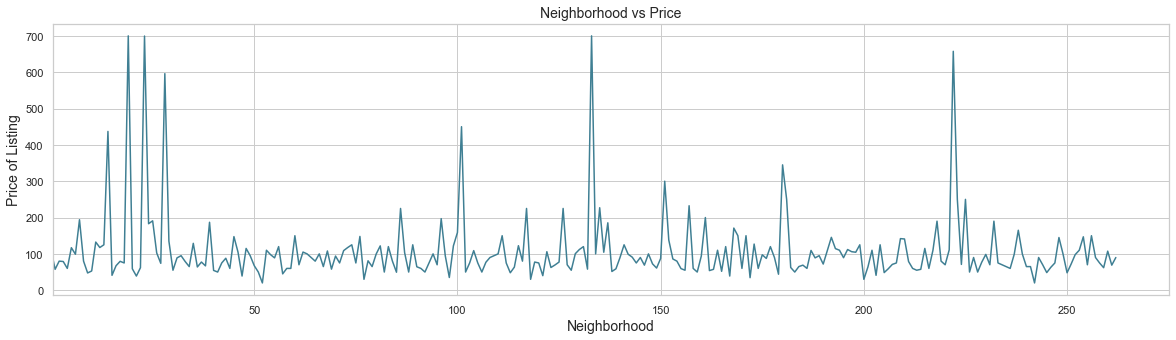

In [28]:
plt.figure(figsize=(20,5))
df.groupby('neighbourhood_cleansed').price.median().plot(kind='line')
plt.title('Neighborhood vs Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price of Listing', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Neighborhoods with most listings are not necessarily the high priced listings. 

## What makes these neighborhood special?

In [29]:
df.sort_values(by = 'price', ascending = False).head(20)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
15406,25000.0,5000.000000,250.000000,1,1125,16,6,8.0,4,12.0,286,0,0,43,101,10.0,10.126631,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,38,10.126631
17058,22000.0,150000.000000,90.307922,18,1125,18,1,8.0,4,10.5,286,0,0,43,101,10.0,9.998798,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,38,9.998798
26006,22000.0,100000.000000,90.307922,14,1125,14,1,7.0,4,6.5,292,0,0,43,25,5.0,9.998798,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,9.998798
17070,21053.0,50000.000000,90.307922,21,1125,21,1,9.0,4,12.5,288,0,0,43,19,10.0,9.954798,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25,9.954798
24993,19008.0,5000.000000,600.000000,1,365,8,6,5.0,4,10.0,286,0,0,43,101,5.0,9.852615,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,26,9.852615
17408,15790.0,100000.000000,90.307922,12,1125,12,1,6.0,4,7.5,292,0,0,43,25,5.0,9.667132,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25,9.667132
17064,15790.0,100000.000000,90.307922,16,1125,16,1,8.0,4,8.5,292,0,0,43,25,8.0,9.667132,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25,9.667132
29105,15000.0,80000.000000,0.000000,10,1125,10,1,5.0,4,5.5,292,0,0,43,25,4.0,9.615805,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,9.615805
35079,15000.0,250000.000000,0.000000,16,1125,16,1,8.0,4,13.0,288,0,0,43,19,11.0,9.615805,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,25,9.615805
17054,13158.0,30000.000000,90.307922,14,1125,14,1,6.0,4,8.5,292,0,0,43,25,6.0,9.484785,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25,9.484785


In [30]:
# checking what are these neighborhoods
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/neighbourhood_cleansed.npy', allow_pickle=True)
print(le.inverse_transform([101]))
print(le.inverse_transform([25]))
print(le.inverse_transform([19]))
print(le.inverse_transform([100]))
print(le.inverse_transform([23]))
print(le.inverse_transform([133]))
print(le.inverse_transform([260]))
print(le.inverse_transform([229]))
print(le.inverse_transform([223]))

['Hollywood Hills West']
['Beverly Hills']
['Bel-Air']
['Hollywood Hills']
['Beverly Crest']
['Malibu']
['Windsor Square']
['Valley Glen']
['Unincorporated Santa Monica Mountains']


In [31]:
# checking bed type
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/bed_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0,5)))

['Airbed' 'Couch' 'Futon' 'Pull-out Sofa' 'Real Bed']


In [32]:
# checking property type
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/property_type.npy', allow_pickle=True)
print(le.inverse_transform([43]))
print(le.inverse_transform([25]))
print(le.inverse_transform([1]))

['Villa']
['House']
['Apartment']


All these listings have more number of bedrooms, bathrooms, accomodates, and real beds. These listings are in elite neighborhoods and most of these listings are villas.

However there are listings with one bedroom and one bathroom and charging $10000.

## Why there is a data point where there is only 1 bedroom but price is high?

In [33]:
df[(df.bedrooms == 1) & (df.bathrooms == 1)].sort_values(by = 'price', ascending = False).head(30)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
18932,10000.0,300.000000,30.000000,1,4,1,6,1.0,4,1.0,244,2,0,1,99,1.0,9.210340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,9.210340
13191,10000.0,453.166605,90.307922,1,29,2,0,1.0,4,1.0,90,0,0,1,260,1.0,9.210340,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,26,9.210340
19624,10000.0,453.166605,90.307922,1,1125,1,0,1.0,4,1.0,170,1,0,1,229,1.0,9.210340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37,9.210340
13491,10000.0,453.166605,90.307922,1,2,3,0,1.0,4,1.0,240,0,1,6,256,1.0,9.210340,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,9.210340
7618,9999.0,2500.000000,898.000000,1,1125,1,6,1.0,4,1.0,24,1,0,1,108,1.0,9.210240,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,9.210240
4036,9999.0,453.166605,90.307922,2,1125,2,0,1.0,4,1.0,267,1,17,1,99,1.0,9.210240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38,9.210240
19166,9888.0,500.000000,100.000000,1,1125,1,6,1.0,4,1.0,241,1,6,15,39,1.0,9.199077,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25,9.199077
7077,7980.0,453.166605,20.000000,1,1125,1,0,1.0,4,1.0,26,1,98,25,192,1.0,8.984694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,25,8.984694
22682,5000.0,5000.000000,40.000000,1,65,4,4,1.0,4,1.0,162,0,68,25,31,2.0,8.517193,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,38,8.517193
10410,5000.0,453.166605,1000.000000,1,1125,2,0,1.0,4,1.0,238,1,0,40,219,1.0,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8.517193


Looks normal. There do exist more similar type of listings.

## Why there are some data points with many bathrooms but listing price is low?

In [34]:
df[(df.bathrooms > 6) & (df.bedrooms == 1)].sort_values(by = 'price', ascending = True).head(10)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
9925,35.0,453.166605,90.307922,1,1125,1,0,1.0,4,8.0,201,2,2,23,92,1.0,3.555348,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
965,35.0,450.000000,35.000000,1,365,1,6,1.0,4,11.0,113,1,12,23,60,1.0,3.555348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27,3.555348
964,35.0,450.000000,35.000000,1,365,1,6,1.0,4,11.0,113,1,5,23,60,1.0,3.555348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27,3.555348
6829,35.0,453.166605,90.307922,1,1125,4,0,1.0,4,8.0,201,2,14,23,10,4.0,3.555348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
413,35.0,453.166605,90.307922,1,1125,4,0,1.0,4,8.0,201,2,46,25,10,4.0,3.555348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
412,35.0,453.166605,90.307922,1,1125,4,0,1.0,4,8.0,201,2,27,25,10,4.0,3.555348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
406,35.0,453.166605,90.307922,1,1125,4,0,1.0,4,8.0,201,2,36,25,92,4.0,3.555348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
332,35.0,453.166605,90.307922,1,1125,4,4,1.0,4,8.0,201,2,18,25,92,4.0,3.555348,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
326,35.0,453.166605,90.307922,1,1125,4,0,1.0,4,8.0,201,2,45,25,10,4.0,3.555348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348
331,35.0,453.166605,90.307922,1,1125,4,4,1.0,4,8.0,201,2,14,25,10,4.0,3.555348,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,3.555348


In [35]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./Label Encoder/property_type.npy', allow_pickle=True)
print(le.inverse_transform([23]))
print(le.inverse_transform([25]))

['Hostel']
['House']


There are hostel type of listings. Though these listings show many bathrooms but they have one bedroom. This tells that the price should be dominate by other factors.

## Why there are data points that can accommodate > 10 people but the listing price do not increase linearly?

In [36]:
df[(df.accommodates >= 10) & (df.price < 500)].sort_values(by = 'price', ascending = False)

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log
28407,499.0,500.0,350.0,1,1125,12,6,5.0,4,4.5,151,0,5,43,196,5.0,6.212606,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,37,6.212606
24856,499.0,400.0,250.0,14,1125,14,6,5.0,4,4.5,80,0,31,43,8,8.0,6.212606,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,41,6.212606
30860,499.0,500.0,289.0,12,1125,16,6,6.0,4,5.5,187,0,4,43,88,7.0,6.212606,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,30,6.212606
23728,499.0,500.0,150.0,1,1125,13,6,3.0,4,2.0,270,0,42,25,24,7.0,6.212606,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,26,6.212606
4115,499.0,495.0,150.0,8,28,10,6,4.0,4,2.0,252,0,1,25,160,7.0,6.212606,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,25,6.212606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28248,29.0,0.0,0.0,1,28,16,4,1.0,4,6.0,101,2,2,23,98,6.0,3.367296,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,27,3.367296
33777,29.0,0.0,0.0,1,28,16,4,1.0,4,6.0,101,2,5,23,98,6.0,3.367296,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,27,3.367296
26557,29.0,0.0,0.0,1,120,16,4,1.0,4,6.0,101,2,9,25,98,6.0,3.367296,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,27,3.367296
28966,29.0,0.0,0.0,1,365,16,4,1.0,4,6.0,101,2,1,23,98,6.0,3.367296,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,27,3.367296


In [37]:
def cal_accommodates_bedroom_ratio(x):
    if x['bedrooms'] != 0:
        return x['accommodates'] / x['bedrooms']
    else:
        return x['accommodates'] / 0.5
    
def cal_accommodates_bathrooms_ratio(x):
    if x['bathrooms'] != 0:
        return x['accommodates'] / x['bathrooms']
    else:
        return x['accommodates'] / 0.5
    
df['accommodates_bedroom_ratio']  = df.apply(cal_accommodates_bedroom_ratio, axis = 1)
df['accommodates_bathroom_ratio'] = df.apply(cal_accommodates_bathrooms_ratio, axis = 1)

In [38]:
df[(df.accommodates >= 14) & (df.price < 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False)

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
15791,16,4.0,3.0,4.000000,5.333333,499.0
18458,14,3.0,4.0,4.666667,3.500000,499.0
24984,16,4.0,2.0,4.000000,8.000000,499.0
24856,14,5.0,4.5,2.800000,3.111111,499.0
12348,14,4.0,4.0,3.500000,3.500000,499.0
...,...,...,...,...,...,...
28966,16,1.0,6.0,16.000000,2.666667,29.0
33777,16,1.0,6.0,16.000000,2.666667,29.0
26557,16,1.0,6.0,16.000000,2.666667,29.0
28248,16,1.0,6.0,16.000000,2.666667,29.0


In [39]:
df[(df.accommodates >= 14) & (df.price < 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False).describe()

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,15.517375,3.814672,2.835907,5.564644,6.659920,282.907336
std,1.832810,1.678760,1.189059,4.131744,3.699795,122.616465
min,14.000000,1.000000,0.500000,2.000000,2.133333,24.000000
25%,14.500000,3.000000,2.000000,3.200000,4.666667,199.000000
50%,16.000000,4.000000,3.000000,4.000000,5.333333,290.000000
75%,16.000000,5.000000,3.000000,5.333333,8.000000,371.500000
max,40.000000,8.000000,7.500000,16.000000,32.000000,499.000000


In [40]:
df[(df.accommodates < 14) | (df.price > 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False).describe()

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
count,38704.000000,38704.000000,38704.000000,38704.000000,38704.000000,38704.000000
mean,3.745143,1.591463,1.504405,2.397416,2.628330,219.402517
std,2.569229,1.028974,0.987468,1.046152,1.391672,587.144851
min,1.000000,1.000000,0.500000,0.181818,0.086957,10.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,69.000000
50%,3.000000,1.000000,1.000000,2.000000,2.000000,115.000000
75%,5.000000,2.000000,2.000000,3.000000,3.333333,199.000000
max,22.000000,15.000000,16.000000,16.000000,32.000000,25000.000000


Looks like these Airbnb are all house, hostel and villa. And their minimum accommodates vs. bedrooms ratio and/or accommodates vs. bathrooms ratio are higher compared to the rest of the data. That's probably why listing price is not increasing linearly.

## What are the most common Airbnb in LA?

In [41]:
df[(df.bedrooms == 1) & (df.bathrooms == 1) & (df.accommodates <= 4)].shape[0] / df.shape[0] * 100

52.93015856724996

1 bedroom 1 bathroom Airbnbs which can accommodate 1 ~ 4 people are most common in LA. About 52% of listings are of this type.

In [42]:
# Save dataframe for later
df.to_csv('./Data/data_eda.csv', index = False)

# Conclusion
1. As expected, listing price is correlated to accommodates, bedrooms, bathroom, neighborhood, and property type.

    - Interestingly, some neighborhoods (like Hollywood Hills West, Beverly Hills, Bel-Air, Hollywood Hills) seem to have higher listing prices.
    - However there might be some exceptions:
        - There might be extremely high listing price although there's only one bedroom, but rarely happened.
        - If the property has a lot more bathrooms, ex. 8, but it's a hostel, the listing price would not increase proportionally.
        - If the property has a lot more bathrooms, ex. 8, but can only accommodate 2 people, the listing price would not increase proportionally, either.
        - If the property is a villa which can accommodate 14 or more people but its accommodates vs. bedrooms ratio and/or accommodates vs. bathrooms ratio are higher, that means more traveler need to share the bedrooms / bathrooms, the listing price would not increase proportionally, either.

- Property-type-wise, most of the property type of LA listings are house and apartment.
- In terms of bedrooms and bathromms, 1 bedroom 1 bathroom Airbnbs which can accommodate 1 ~ 4 people are most common in LA.
    - About 52% of LA Airbnb listings are of this type.
    - For the rest of Airbnbs, not many of them can accommodate more than 10 people. In fact, only 2.75% of listings can accommodate more than 10 people.
- Amenities affecting price: check_in_24h, air_conditioning, bbq, balcony, bed_linen, tv, coffee_machine, cooking_basics, white_goods, elevator, gym, child_friendly, parking, outdoor_space, hot_tub_sauna_or_pool, internet, long_term_stays, pets_allowed, private_entrance, refrigerator, secure are some amenities if provided, help raise the price of a listing